# Proyecto 1 (Inteligencia de Negocios)

## Roles

- Rol --- Juan Nicolas Suarez
- Rol --- David Santiago Carillo
- Rol --- 



## Objetivo principal del proyecto

- Vincular de forma automática las opiniones de la ciudadanía con los Objetivos de Desarrollo
Sostenible (ODS) 1, 3 y 4

    **1.“Fin de la pobreza”** 

    **3.“Salud y bienestar”**

    **4.“Educación de calidad”**

## Etapa 1 del Proyecto

## Objetivo Etapa 1
- Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.


## Tareas

1. Canvas de aprendizaje automatico

## Modelo de Machine Learning

### 1. Instalacion e importacion de librerias

In [52]:
#!pip uninstall -y pandas-profiling


In [53]:
#!pip install -U "visions[type_image_path]>=0.7.5,<0.8.2"


In [54]:
#!pip install -U ydata-profiling

In [55]:
#!pip install numba==0.56.4


In [56]:
%pip install "numpy==1.26.4"

%pip install nltk "spacy<3.8"




Note: you may need to restart the kernel to use updated packages.



In [57]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ------------- -------------------------- 4.2/12.9 MB 22.9 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.9 MB 22.8 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 22.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [58]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 1.1 Descargar Stopwords y lema de palabras

In [60]:
# StopWords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
#WordNetLemmatizer (lema)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import spacy

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

from collections import Counter


from sklearn.base import BaseEstimator, ClassifierMixin
#from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt

In [63]:
print(spacy.__version__)


3.7.5


### 2.Perfilamiento y entendmiento de los datos

### 2.1 Lectura de los datos

In [64]:
df_text = pd.read_excel('data/Datos_proyecto.xlsx' )
df_textC = df_text

In [65]:
df_textC

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [66]:
df_textC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


### 2.2 Estadisticas Descriptivas
Vamos a analizar los textos por medio de **maximo** , **minimo** y **moda** 

In [67]:
from collections import Counter

texts = df_textC.copy()
texts['Count'] = [len(x) for x in texts['textos']]
texts['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts["Moda"] = [Counter(i.split(" ")).most_common(1)[0][0] for i in texts["textos"] ]
#ProfileReport(texts)

In [68]:
texts

,textos,labels,Count,Max,Min,Moda
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,de
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,y
2,"Además, la formación de especialistas en medic...",3,659,15,1,de
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,de
4,Este grupo se centró en las personas que padec...,3,608,14,0,de
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,de
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,de
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,el
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,el


### 3. Preparación de datos

### 3.1 Limpieza de datos

In [69]:
"""Remove non-ASCII characters from list of tokenized words"""
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

"""Convert all characters to lowercase from list of tokenized words """
def to_lowercase(words):
    return [ word.lower() for word in words]

"""Remove punctuation from list of tokenized words"""
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

"""Remove stop words from list of tokenized words"""
def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    return [w for w in words if w.lower() not in stop_words]
  
"""Make all transformations to text"""
def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words






### 3.2 Tokenizacion
Obtenemos todas las palabras separadas para usarlo en el analisis

In [70]:
df_textC['palabras'] = df_textC['textos'].apply(word_tokenize)

df_textC.head()


,textos,labels,palabras
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


Le aplicamos el procesamiento para quitar puntuaciones , stopwords y pasar todas las palabras a minuscula.

In [71]:
df_textC['palabrasProces'] = df_textC['palabras'].apply(preprocessing)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


### 3.2 Normalizacion

In [72]:
import spacy
# Stemmer para palabras en español
stemmer = SnowballStemmer("spanish")

# Load spaCy Spanish model
nlp = spacy.load("es_core_news_sm")



def stem_words(words):
    """Stem words in list of tokenized words (Spanish)."""
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize words in list of tokenized words (Spanish)."""
    doc = nlp(" ".join(words))
    # Return lemmas, focusing on verbs (if you want *all words*, remove the if check)
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Combine stems and lemmas (verbs) if needed."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

df_textC['palabras']=df_textC['palabrasProces'].apply(stem_and_lemmatize)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[aprendizaj, educ, consider, sinon, escolariz,...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[nin, mas, pequen, beb, nin, pequen, capacit, ...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[adem, formacion, especial, medicin, general, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[pais, ocde, tiend, pas, curs, obligatori, opt...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[grup, centr, person, padec, trastorn, mental,...","[grupo, centro, personas, padecen, trastornos,..."


In [73]:
df_textC.sample(20)

,textos,labels,palabras,palabrasProces
681,Si bien es probable que la tarea tenga efectos...,4,"[si, bien, probabl, tare, efect, posit, estudi...","[si, bien, probable, tarea, efectos, positivos..."
514,Los programas de almuerzo gratis o los libros ...,4,"[program, almuerz, gratis, libr, text, gratuit...","[programas, almuerzo, gratis, libros, texto, g..."
14,Esto podría involucrar un sistema de acreditac...,4,"[podri, involucr, sistem, acredit, certific, e...","[podria, involucrar, sistema, acreditacion, ce..."
702,"Luego, el índice se utilizó para explicar las ...",4,"[lueg, indic, utiliz, explic, puntuacion, pis,...","[luego, indice, utilizo, explicar, puntuacione..."
1680,Mientras que el efecto crecimiento predominó e...,1,"[mientr, efect, crecimient, predomin, practic,...","[mientras, efecto, crecimiento, predomino, pra..."
558,"Alrededor del 10,5 por ciento de ellos viven c...",3,"[alrededor, 105, cient, viv, vih, dat, nivel, ...","[alrededor, 105, ciento, viven, vih, datos, ni..."
1287,"A pesar de esto, aún persiste una incertidumbr...",3,"[pes, aun, pers, incertidumbr, consider, i, po...","[pesar, aun, persiste, incertidumbre, consider..."
1873,Esto fue ligeramente más alto que el promedio ...,4,"[liger, mas, alto, promedi, ocde, 1600, hor, e...","[ligeramente, mas, alto, promedio, ocde, 1600,..."
2299,"Para la mayoría de los niños, las transiciones...",4,"[mayori, nin, transicion, satisfactori, gratif...","[mayoria, ninos, transiciones, satisfactorias,..."
2270,Los datos se refieren a la duración promedio d...,3,"[dat, refier, duracion, promedi, estadi, atenc...","[datos, refieren, duracion, promedio, estadia,..."


### 3.3 Entrenamiento y split de los datos para testing

In [74]:
X = df_textC["palabras"]                 # list of tokens per row
y = df_textC["labels"].astype(int)     # already numeric; ensure int dtype

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3.4 Vectorizar texto ya tokenizado

 TF-IDF : Term Frequency-Inverse Document Frequency

In [75]:
identity = lambda x: x
vec_tfidf = TfidfVectorizer(
    tokenizer=identity, preprocessor=identity, token_pattern=None,
    # sublinear_tf=True, min_df=2, ngram_range=(1,2)
)

X_train_tfidf = vec_tfidf.fit_transform(X_train)
X_test_tfidf  = vec_tfidf.transform(X_test)



### 4.1 Entrenar primer modelo de clasificacion

#### 4.1.1 Regresion Logistica (Juan Nicolas)

In [76]:


clf = LogisticRegression(max_iter=200, n_jobs=None)  # n_jobs not in LR; keep default
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.969     0.921     0.944       101
           3      0.961     0.966     0.964       179
           4      0.962     0.980     0.971       205

    accuracy                          0.963       485
   macro avg      0.964     0.956     0.960       485
weighted avg      0.963     0.963     0.963       485



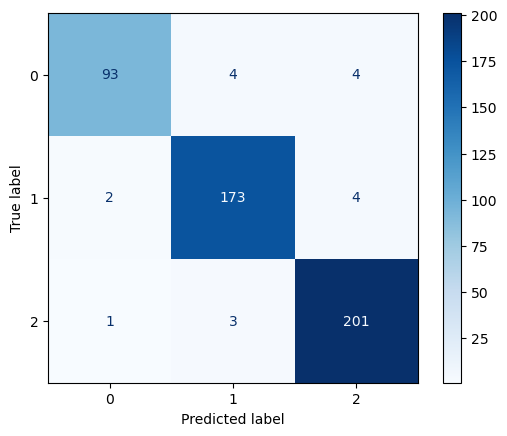

In [79]:
confusion_matrix =confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()